In [1]:
import pandas as pd
import geopandas as gpd
from geopandas.tools import geocode
import matplotlib.pyplot as plt

pd.options.display.max_colwidth= 200
pd.set_option('display.max_rows', 20)

C:\Users\Ricardo\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
data = pd.read_csv('~/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/raw/Agencias.csv', sep=',')

# Preparing Data

### Correcting 2 addresses

In [4]:
# Changing CEP and Bairro values to none because it's pointing to another municipality
# And Bairro to 'JARDIM PAULISTA', not JARDIM AMERICA
data.iloc[9993, 11] = None
data.iloc[9993, 10] = 'JARDIM PAULISTA'

In [5]:
data.iloc[9993]

CnpjBase                               90400888
CnpjSequencial                             1590
CnpjDv                                       95
NomeIf            BANCO SANTANDER (BRASIL) S.A.
Segmento                         Banco Múltiplo
CodigoCompe                              3563.0
NomeAgencia                   SP-AV. 9 DE JULHO
Endereco                 RUA ESTADOS UNIDOS,746
Numero                                      NaN
Complemento                                 NaN
Bairro                          JARDIM PAULISTA
Cep                                        None
MunicipioIbge                           3550308
Municipio                             SAO PAULO
UF                                           SP
DataInicio                           30/04/2009
DDD                                        11.0
Telefone                              8705221.0
Posicao                              28/12/2021
Name: 9993, dtype: object

In [86]:
# Changing 5.460 to 5460
data.iloc[5928, 7] = 'AV. CUPECÊ, 5460'

In [87]:
data.iloc[5928]

CnpjBase                    60701190
CnpjSequencial                  2745
CnpjDv                            73
NomeIf            ITAÚ UNIBANCO S.A.
Segmento              Banco Múltiplo
CodigoCompe                   6507.0
NomeAgencia         SP/JARDIM MIRIAM
Endereco            AV. CUPECÊ, 5460
Numero                           NaN
Complemento                      NaN
Bairro                 CIDADE ADEMAR
Cep                        04366-001
MunicipioIbge                3550308
Municipio                  SAO PAULO
UF                                SP
DataInicio                29/12/2005
DDD                             11.0
Telefone                  30034828.0
Posicao                   28/12/2021
Name: 5928, dtype: object

In [6]:
data

CnpjBase  CnpjSequencial  CnpjDv                         NomeIf  \
0      60746948            9648      55            BANCO BRADESCO S.A.   
1        360305            4791      24        CAIXA ECONOMICA FEDERAL   
2      60701190            4669      95             ITAÚ UNIBANCO S.A.   
3             0            7687      23           BANCO DO BRASIL S.A.   
4             0            7686      42           BANCO DO BRASIL S.A.   
...         ...             ...     ...                            ...   
18296         0            6639      72           BANCO DO BRASIL S.A.   
18297  90400888            2267       1  BANCO SANTANDER (BRASIL) S.A.   
18298  60701190             928      90             ITAÚ UNIBANCO S.A.   
18299  60701190             308      60             ITAÚ UNIBANCO S.A.   
18300  90400888            2297      27  BANCO SANTANDER (BRASIL) S.A.   

                      Segmento  CodigoCompe                NomeAgencia  \
0               Banco Múltiplo       7059.0    TOP TIER - BRASILIA, DF   
1      Caixa Econômica Federal       4791.0                ITARIRI, SP   
2               Banco Múltiplo       9691.0     PERSONNALITE AMERICANA   
3               Banco Múltiplo       9190.0       ESCR.EXC.RUDGE RAMOS   
4               Banco Múltiplo       9189.0         ESCR.EXC.S.B.CAMPO   
...                        ...          ...                        ...   
18296           Banco Múltiplo       6968.0           AVENIDA PORTUGAL   
18297           Banco Múltiplo       4362.0        001-4362 RIO-GRAJAU   
18298           Banco Múltiplo        530.0    RIO/MERCADO S.SEBASTIAO   
18299           Banco Múltiplo         71.0  MANAUS/EDUARDO RIBEIRO-AM   
18300           Banco Múltiplo       3381.0      001 3381 SAARA-RIO-RJ   

                                    Endereco Numero             Complemento  \
0      SETOR SCS, QD 2, BL A 81, S/N, 1º PAV    NaN  EDIF BRADESCO BRASILIA   
1               AVENIDA JOSE FERREIRA FRANCO    NaN                     NaN   
2                        RUA WASHINGTON LUIZ    420                     NaN   
3                  AV.SENADOR VERGUEIRO,4285    NaN                  SALA B   
4                  AV.SENADOR VERGUEIRO,4285    NaN                  SALA A   
...                                      ...    ...                     ...   
18296                       AVENIDA PORTUGAL    777                     NaN   
18297                  RUA BARAO DE MESQUITA    625                LJ A/B/C   
18298                             AV. BRASIL  23800         /RUA DA SOJA 82   
18299           AVENIDA EDUARDO RIBEIRO, 399    NaN                     NaN   
18300                RUA REPUBLICA DO LIBANO    NaN                     NaN   

              Bairro        Cep  MunicipioIbge              Municipio  UF  \
0            ASA SUL  70329-900        5300108               BRASILIA  DF   
1             CENTRO  11760-000        3523305                ITARIRI  SP   
2             CENTRO  13465-520        3501608              AMERICANA  SP   
3            R RAMOS  09605-000        3548708  SAO BERNARDO DO CAMPO  SP   
4           R FRAMOS  09605-000        3548708  SAO BERNARDO DO CAMPO  SP   
...              ...        ...            ...                    ...  ..   
18296         CENTRO  09041-320        3547809            SANTO ANDRE  SP   
18297        ANDARAI  20540-155        3304557         RIO DE JANEIRO  RJ   
18298  VIGARIO GERAL  21012-350        3304557         RIO DE JANEIRO  RJ   
18299         CENTRO  69010-000        1302603                 MANAUS  AM   
18300         CENTRO  20061-030        3304557         RIO DE JANEIRO  RJ   

       DataInicio   DDD    Telefone     Posicao  
0      12/11/2018  61.0  32181117.0  28/12/2021  
1      14/06/2013  13.0  34188100.0  28/12/2021  
2      10/07/2012  11.0  30034828.0  28/12/2021  
3      21/09/2018  11.0  40033001.0  28/12/2021  
4      21/09/2018  11.0  40033001.0  28/12/2021  
...           ...   ...         ...         ...  
18296

### Filtering São Paulo Municipality

In [8]:
data_sp = data[(data['UF'] == 'SP') & (data['Municipio'] == 'SAO PAULO')]

In [9]:
data_sp

CnpjBase  CnpjSequencial  CnpjDv                             NomeIf  \
24     30306294              16      21             BANCO BTG PACTUAL S.A.   
34     58160789             120      53                   BANCO SAFRA S.A.   
39     58160789             200      72                   BANCO SAFRA S.A.   
48     90400888             775      28      BANCO SANTANDER (BRASIL) S.A.   
58     11703662               1      44      TRAVELEX BANCO DE CÂMBIO S.A.   
...         ...             ...     ...                                ...   
18255  60746948            9885      25                BANCO BRADESCO S.A.   
18258  60701190            1334       6                 ITAÚ UNIBANCO S.A.   
18262    806535               1      54  PLANNER CORRETORA DE VALORES S.A.   
18290    360305            2873       6            CAIXA ECONOMICA FEDERAL   
18293  90400888            2614      50      BANCO SANTANDER (BRASIL) S.A.   

                         Segmento  CodigoCompe  \
24                 Banco Múltiplo         30.0   
34                 Banco Múltiplo        140.0   
39                 Banco Múltiplo        282.0   
48                 Banco Múltiplo       2073.0   
58                Banco de Câmbio          NaN   
...                           ...          ...   
18255              Banco Múltiplo       3860.0   
18258              Banco Múltiplo       1546.0   
18262  Sociedade Corretora de TVM          NaN   
18290     Caixa Econômica Federal       2873.0   
18293              Banco Múltiplo       1207.0   

                          NomeAgencia  \
24                               BAAS   
34                            TATUAPE   
39                            DIGITAL   
48                     ANTILHAS-SP-SP   
58                             MATRIZ   
...                               ...   
18255                        NEXT XIV   
18258           SP CENTRO EMPRESARIAL   
18262                          MATRIZ   
18290            PATIO DO COLEGIO, SP   
18293  001 1207  AV.VITAL BRASIL-SP I   

                                      Endereco Numero  \
24               AVENIDA BRIGADEIRO FARIA LIMA   3064   
34     RUA CANTAGALO, CONJS. 501 A 505 BLOCO A    NaN   
39                            AVENIDA PAULISTA   1450   
48                                 RUA AUGUSTA    129   
58                 AV ENG. LUIZ CARLOS BERRINI    NaN   
...                                        ...    ...   
18255            RUA DOMINGOS SéRGIO DOS ANJOS    NaN   
18258               AV MARIA COELHO AGUIAR 215    NaN   
18262            AVENIDA BRIGADEIRO FARIA LIMA   3064   
18290               PARQUE ANHANGABAU, NUM 226    NaN   
18293                          AV VITAL BRASIL    NaN   

                                              Complemento              Bairro  \
24                                              12º ANDAR          ITAIM BIBI   
34               LOJAS 1, 2, 3, 4 E 5 DO PAVIMENTO TÉRREO   VILA GOMES CARDIM   
39     17º AND CONJ.175 - COND. CETENCO PLAZA TORRE NORTE          BELA VISTA   
48                                               LJ / SLJ     CERQUEIRA CESAR   
58        5º ANDAR - CONJS 51 E 52 - EDIFÍCIO BERRINI ONE      CIDADE MONÇÕES   
...                                                   ...                 ...   
18255                                   1º ANDAR, SALA 14  JARDIM SANTO ELIAS   
18258                                         1º SUB SOLO     JARDIM SAO LUIS   
18262            10º ANDAR - COND. ED. PEDRO MARIZ - B 31          ITAIM BIBI   
18290                                                 NaN              CENTRO   
18293                                                 NaN             BUTANTA   

             Cep  MunicipioIbge  Municipio  UF  DataInicio   DDD    Telefone  \
24     01425-010        3550308  SAO PAULO  SP  07/08/2020  11.0      3383.0   
34     03319-000        3550308  SAO PAULO  SP  28/03/1994  11.0  20956150.0   
39     01310-930        3550308  SAO PAULO  SP  03/12/2019  11.0  31757575.0  

In [10]:
data_sp["endereco_completo"] = data_sp["Endereco"].fillna('') + ", " + data_sp["Numero"].fillna('') + ", " + data_sp["Bairro"].fillna('') + ", " + data_sp["Cep"].fillna('') + ", " + data_sp["Municipio"].fillna('')

C:\Users\Ricardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data_sp[data_sp['endereco_completo'].isnull()]

Empty DataFrame
Columns: [CnpjBase, CnpjSequencial, CnpjDv, NomeIf, Segmento, CodigoCompe, NomeAgencia, Endereco, Numero, Complemento, Bairro, Cep, MunicipioIbge, Municipio, UF, DataInicio, DDD, Telefone, Posicao, endereco_completo]
Index: []

# Geocoding

In [91]:
gdf_agencias_sp = geocode(data_sp["endereco_completo"], provider="arcgis", user_agent="autogis_xx", timeout=4)

In [92]:
#gdf_agencias_sp_copy = gdf_agencias_sp.copy(deep=True)

### Preparing Data to Save

In [93]:
gdf_agencias_sp['lon'] = gdf_agencias_sp['geometry'].x
gdf_agencias_sp['lat'] = gdf_agencias_sp['geometry'].y

In [62]:
gdf_agencias_sp

geometry  \
24     POINT (-46.68407 -23.58329)   
34     POINT (-46.56915 -23.54616)   
39     POINT (-46.65516 -23.56235)   
48     POINT (-46.66701 -23.56462)   
58     POINT (-46.69184 -23.60271)   
72     POINT (-46.68407 -23.58329)   
89     POINT (-46.70430 -23.62449)   
96     POINT (-46.54756 -23.52436)   
108    POINT (-46.68628 -23.59163)   
109    POINT (-46.61585 -23.53147)   
112    POINT (-46.64780 -23.49347)   
131    POINT (-46.63879 -23.54125)   
134    POINT (-46.69378 -23.56099)   
136    POINT (-46.63753 -23.54895)   
147    POINT (-46.67567 -23.58896)   
154    POINT (-46.67927 -23.58574)   
165    POINT (-46.73274 -23.54024)   
168    POINT (-46.67129 -23.58512)   
173    POINT (-46.68016 -23.59030)   
191    POINT (-46.65957 -23.55840)   
192    POINT (-46.65934 -23.55864)   
193    POINT (-46.65795 -23.56024)   
196    POINT (-46.68370 -23.58400)   
209    POINT (-46.68227 -23.58796)   
210    POINT (-46.67599 -23.58893)   
219    POINT (-46.54022 -23.56938)   
223    POINT (-46.65934 -23.55864)   
225    POINT (-46.64886 -23.56787)   
226    POINT (-46.68177 -23.59020)   
227    POINT (-46.69176 -23.56988)   
228    POINT (-46.68776 -23.57561)   
249    POINT (-46.58390 -23.51356)   
252    POINT (-46.69347 -23.56844)   
269    POINT (-46.68227 -23.58796)   
275    POINT (-46.57367 -23.54510)   
276    POINT (-46.68628 -23.59163)   
280    POINT (-46.64394 -23.59705)   
288    POINT (-46.66774 -23.60979)   
296    POINT (-46.68313 -23.58552)   
297    POINT (-46.69043 -23.57195)   
298    POINT (-46.68227 -23.58796)   
299    POINT (-46.69184 -23.60271)   
301    POINT (-46.70430 -23.62449)   
303    POINT (-46.67363 -23.56014)   
307    POINT (-46.64276 -23.54788)   
308    POINT (-46.60692 -23.47841)   
320    POINT (-46.63820 -23.61482)   
322    POINT (-46.68611 -23.56867)   
324    POINT (-46.70507 -23.52416)   
326    POINT (-46.68407 -23.58329)   
329    POINT (-46.67401 -23.58447)   
335    POINT (-46.65771 -23.56027)   
372    POINT (-46.65329 -23.56382)   
375    POINT (-46.69457 -23.50187)   
377    POINT (-46.65329 -23.56382)   
396    POINT (-46.69060 -23.59040)   
427    POINT (-46.63338 -23.56663)   
442    POINT (-46.68117 -23.59063)   
443    POINT (-46.65329 -23.56382)   
445    POINT (-46.65329 -23.56382)   
485    POINT (-46.63661 -23.60372)   
507    POINT (-46.65378 -23.56339)   
548    POINT (-46.63508 -23.54770)   
550    POINT (-46.64518 -23.57287)   
551    POINT (-46.64438 -23.63447)   
552    POINT (-46.63637 -23.54684)   
562    POINT (-46.65329 -23.56382)   
580    POINT (-46.50858 -23.51104)   
581    POINT (-46.64438 -23.63447)   
596    POINT (-46.68165 -23.58891)   
597    POINT (-46.65329 -23.56382)   
598    POINT (-46.57304 -23.54714)   
599    POINT (-46.63415 -23.54792)   
602    POINT (-46.65329 -23.56382)   
619    POINT (-46.67578 -23.52598)   
646    POINT (-46.66390 -23.60857)   
647    POINT (-46.68660 -23.59710)   
648    POINT (-46.63426 -23.54601)   
650    POINT (-46.68165 -23.58891)   
675    POINT (-46.63676 -23.60094)   
690    POINT (-46.60111 -23.59500)   
695    POINT (-46.66398 -23.53230)   
700    POINT (-46.72681 -23.56079)   
707    POINT (-46.53258 -23.55098)   
713    POINT (-46.68353 -23.58298)   
733    POINT (-46.66139 -23.55679)   
736    POINT (-46.65547 -23.56207)   
737    POINT (-46.63502 -23.54518)   
753    POINT (-46.64647 -23.56955)   
754    POINT (-46.69578 -23.63671)   
755    POINT (-46.62642 -23.50426)   
756    POINT (-46.67524 -23.54011)   
757    POINT (-46.66390 -23.60857)   
758    POINT (-46.69798 -23.55935)   
759    POINT (-46.66533 -23.54538)   
760    POINT (-46.56310 -23.55384)   
761    POINT (-46.64591 -23.53205)   
791    POINT (-46.66060 -23.55816)   
792    POINT (-46.63385 -23.54963)   
795    POINT (-46.63338 -23.53687)   
799    POINT (-46.66774 -23.60979)   
826    POINT (-46.67960 -23.65936)   
831    POINT (-46.58645 -23.51403)   
832    POINT (-46.66060 -23.55816)   
839    POINT (-46.63415 -23.54792)  

In [94]:
gdf_agencias_sp = gdf_agencias_sp[['address', 'lon', 'lat']]

In [95]:
# Joining tables by indexes
join = gdf_agencias_sp.join(data_sp)

In [65]:
join

address  \
24                    Avenida Brigadeiro Faria Lima 3064, Itaim Bibi, São Paulo, 01451-000   
34                                        Rua Cantagalo 501, Tatuapé, São Paulo, 03319-000   
39                                 Avenida Paulista 1450, Bela Vista, São Paulo, 01310-100   
48                                      Rua Augusta, Jardim Paulista, São Paulo, 01413-100   
58                Avenida Engenheiro Luís Carlos Berrini, Itaim Bibi, São Paulo, 04571-010   
72                    Avenida Brigadeiro Faria Lima 3064, Itaim Bibi, São Paulo, 01451-000   
89                      Avenida das Nações Unidas 14401, Santo Amaro, São Paulo, 04795-100   
96                                    Rua Doutor João Ribeiro, Penha, São Paulo, 03634-010   
108              Avenida Presidente Juscelino Kubitschek, Itaim Bibi, São Paulo, 04543-011   
109                                                                    Praça Eduardo Rudge   
112                                     Avenida Imirim 1421, Santana, São Paulo, 02465-100   
131                                      Avenida Ipiranga, República, São Paulo, 01040-000   
134                        Avenida Pedroso de Morais 1201, Pinheiros, São Paulo, 05420-001   
136                                            Rua Líbero Badaró, Sé, São Paulo, 01009-000   
147                   Rua Doutor Eduardo de Souza Aranha, Itaim Bibi, São Paulo, 04543-121   
154                             Rua Joaquim Floriano 960, Itaim Bibi, São Paulo, 04534-004   
165                                                  05317-020, Vila Leopoldina, São Paulo   
168           Avenida Presidente Juscelino Kubitschek 44, Itaim Bibi, São Paulo, 04543-000   
173              Avenida Presidente Juscelino Kubitschek, Itaim Bibi, São Paulo, 04543-011   
191                                Avenida Paulista 2064, Consolação, São Paulo, 01310-200   
192                                Avenida Paulista 2028, Consolação, São Paulo, 01310-200   
193                                Avenida Paulista, Jardim Paulista, São Paulo, 01311-200   
196                   Avenida Brigadeiro Faria Lima 3144, Itaim Bibi, São Paulo, 01451-000   
209                        Avenida Brigadeiro Faria Lima, Itaim Bibi, São Paulo, 04538-132   
210              Avenida Presidente Juscelino Kubitschek, Itaim Bibi, São Paulo, 04543-000   
219                    Avenida Doutor Eduardo Cotching, Vila Formosa, São Paulo, 03356-001   
223                                Avenida Paulista 2028, Consolação, São Paulo, 01310-200   
225                                     Avenida Paulista, Bela Vista, São Paulo, 01311-000   
226                   Avenida Brigadeiro Faria Lima 3900, Itaim Bibi, São Paulo, 04538-132   
227                    Avenida Brigadeiro Faria Lima 1384, Pinheiros, São Paulo, 01451-001   
228                         Avenida Brigadeiro Faria Lima, Pinheiros, São Paulo, 01452-000   
249                                     Rua Araritaguaba, Vila Maria, São Paulo, 02122-011   
252                                 Rua Cláudio Soares 72, Pinheiros, São Paulo, 05422-030   
269                        Avenida Brigadeiro Faria Lima, Itaim Bibi, São Paulo, 04538-132   
275                                     Praça Sílvio Romero, Tatuapé, São Paulo, 03323-000   
276              Avenida Presidente Juscelino Kubitschek, Itaim Bibi, São Paulo, 04543-011   
280                                   Rua Borges Lagoa, Vila Mariana, São Paulo, 04038-031   
288                                   Avenida Ibirapuera 3103, Moema, São Paulo, 04029-200   
296                   Avenida Brigadeiro Faria Lima 3320, Itaim Bibi, São Paulo, 04538-132   
297                         Avenida Brigadeiro Faria Lima, Pinheiros, São Paulo, 01451-001   
298                        Avenida Brigadeiro Faria Lima, Itaim Bibi, São Paulo, 04538-132   
299               Avenida Engenheiro Luís Carlos Berrini, Itaim Bibi, São Paulo, 04571-010   
301                     Avenida das Naçõe

In [96]:
join.to_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/agencias_latlong.csv', sep=';', encoding='utf-8', index=False)

### Load Data and Set CRS

In [13]:
gdf_agencias_sp = pd.read_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/agencias_latlong.csv', sep=';')

In [14]:
gdf_agencias_sp

address  \
0          Avenida Brigadeiro Faria Lima 3064, Itaim Bibi, São Paulo, 01451-000   
1                              Rua Cantagalo 501, Tatuapé, São Paulo, 03319-000   
2                       Avenida Paulista 1450, Bela Vista, São Paulo, 01310-100   
3                            Rua Augusta, Jardim Paulista, São Paulo, 01413-100   
4      Avenida Engenheiro Luís Carlos Berrini, Itaim Bibi, São Paulo, 04571-010   
...                                                                         ...   
2117          Rua Domingos Sérgio dos Anjos, São Domingos, São Paulo, 05136-170   
2118  Avenida Maria Coelho de Aguiar 215, Jardim São Luís, São Paulo, 05805-000   
2119       Avenida Brigadeiro Faria Lima 3064, Itaim Bibi, São Paulo, 01451-000   
2120                            Parque Anhangabaú 226, Sé, São Paulo, 01313-001   
2121                        Avenida Vital Brasil, Butantã, São Paulo, 05503-000   

            lon        lat  CnpjBase  CnpjSequencial  CnpjDv  \
0    -46.684070 -23.583290  30306294              16      21   
1    -46.569150 -23.546160  58160789             120      53   
2    -46.655160 -23.562350  58160789             200      72   
3    -46.667015 -23.564621  90400888             775      28   
4    -46.691840 -23.602715  11703662               1      44   
...         ...        ...       ...             ...     ...   
2117 -46.750730 -23.500991  60746948            9885      25   
2118 -46.731640 -23.648380  60701190            1334       6   
2119 -46.684070 -23.583290    806535               1      54   
2120 -46.636800 -23.546650    360305            2873       6   
2121 -46.709970 -23.570800  90400888            2614      50   

                                 NomeIf                    Segmento  \
0                BANCO BTG PACTUAL S.A.              Banco Múltiplo   
1                      BANCO SAFRA S.A.              Banco Múltiplo   
2                      BANCO SAFRA S.A.              Banco Múltiplo   
3         BANCO SANTANDER (BRASIL) S.A.              Banco Múltiplo   
4         TRAVELEX BANCO DE CÂMBIO S.A.             Banco de Câmbio   
...                                 ...                         ...   
2117                BANCO BRADESCO S.A.              Banco Múltiplo   
2118                 ITAÚ UNIBANCO S.A.              Banco Múltiplo   
2119  PLANNER CORRETORA DE VALORES S.A.  Sociedade Corretora de TVM   
2120            CAIXA ECONOMICA FEDERAL     Caixa Econômica Federal   
2121      BANCO SANTANDER (BRASIL) S.A.              Banco Múltiplo   

      CodigoCompe                     NomeAgencia  ...              Bairro  \
0            30.0                            BAAS  ...          ITAIM BIBI   
1           140.0                         TATUAPE  ...   VILA GOMES CARDIM   
2           282.0                         DIGITAL  ...          BELA VISTA   
3          2073.0                  ANTILHAS-SP-SP  ...     CERQUEIRA CESAR   
4             NaN                          MATRIZ  ...      CIDADE MONÇÕES   
...           ...                             ...  ...                 ...   
2117       3860.0                        NEXT XIV  ...  JARDIM SANTO ELIAS   
2118       1546.0           SP CENTRO EMPRESARIAL  ...     JARDIM SAO LUIS   
2119          NaN                          MATRIZ  ...          ITAIM BIBI   
2120       2873.0            PATIO DO COLEGIO, SP  ...              CENTRO   
2121       1207.0  001 1207  AV.VITAL BRASIL-SP I  ...             BUTANTA   

            Cep MunicipioIbge  Municipio  UF  DataInicio   DDD    Telefone  \
0     01425-010       3550308  SAO PAULO  SP  07/08/2020  11.0      3383.0   
1     03319-000       3550308  SAO PAULO  SP  28/03/1994  11.0  20956150.0   
2     01310-930       3550308  SAO PAULO  SP  03/12/2019  11.0  31757575.0   
3     01413-100       3550308  SAO PAULO  SP  31/08/2006  11.0  30626366.0   
4     04571-010       3550308  SAO PAULO  SP  01/03/2016  11.0  36141100.0   
...         ...           ...        ...  ..    

In [15]:
# Set crs to use degrees in the first moment
# https://gis.stackexchange.com/questions/345071/matching-x-and-y-axis-coordinates-of-two-geopandas-geometries-to-overlay-them
gdf_agencias_sp_points = gpd.GeoDataFrame(gdf_agencias_sp, geometry=gpd.points_from_xy(gdf_agencias_sp['lon'], gdf_agencias_sp['lat']), crs=4326)

In [17]:
# Then, set the crs of points to the crs of shapefile map which is in meters
gdf_agencias_sp_points = gdf_agencias_sp_points.to_crs(sp_shp.crs)

In [18]:
gdf_agencias_sp_points.crs

<Projected CRS: EPSG:29193>
Name: SAD69 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: South American Datum 1969
- Ellipsoid: GRS 1967 Modified
- Prime Meridian: Greenwich

### Spatial Join to Get Only the Agencies Inside São Paulo Municipality

In [19]:
# Spatial join to get only the points inside polygon
gdf_agencias_sp_points_join = gpd.sjoin(gdf_agencias_sp_points, sp_shp, predicate='within')

In [31]:
gdf_agencias_sp_points_join

address  \
0          Avenida Brigadeiro Faria Lima 3064, Itaim Bibi, São Paulo, 01451-000   
4      Avenida Engenheiro Luís Carlos Berrini, Itaim Bibi, São Paulo, 04571-010   
5          Avenida Brigadeiro Faria Lima 3064, Itaim Bibi, São Paulo, 01451-000   
8     Avenida Presidente Juscelino Kubitschek, Itaim Bibi, São Paulo, 04543-011   
14         Rua Doutor Eduardo de Souza Aranha, Itaim Bibi, São Paulo, 04543-121   
...                                                                         ...   
1372                        Rua Parapuã 1365, Brasilândia, São Paulo, 02831-001   
1801  Avenida Deputado Cantídio Sampaio 1080, Brasilândia, São Paulo, 02860-001   
1422                Avenida Sadamu Inoue 291, Parelheiros, São Paulo, 04865-005   
1493        Avenida Senador Teotônio Vilela, Cidade Dutra, São Paulo, 04801-000   
1784                  Estrada da Colônia 359, Parelheiros, São Paulo, 04892-000   

            lon        lat  CnpjBase  CnpjSequencial  CnpjDv  \
0    -46.684070 -23.583290  30306294              16      21   
4    -46.691840 -23.602715  11703662               1      44   
5    -46.684070 -23.583290  69720910               1      45   
8    -46.686285 -23.591626  90400888             807      40   
14   -46.675668 -23.588961  63062749               1      83   
...         ...        ...       ...             ...     ...   
1372 -46.690524 -23.472971    360305            4988      54   
1801 -46.677510 -23.467920  60746948            6746      95   
1422 -46.722896 -23.775724    360305            3579      59   
1493 -46.716920 -23.765965  60701190             741      32   
1784 -46.727351 -23.827968  60746948            6491      51   

                                     NomeIf  \
0                    BANCO BTG PACTUAL S.A.   
4             TRAVELEX BANCO DE CÂMBIO S.A.   
5     CCB BRASIL ARRENDAMENTO MERCANTIL S/A   
8             BANCO SANTANDER (BRASIL) S.A.   
14        FATOR S.A. - CORRETORA DE VALORES   
...                                     ...   
1372                CAIXA ECONOMICA FEDERAL   
1801                    BANCO BRADESCO S.A.   
1422                CAIXA ECONOMICA FEDERAL   
1493                     ITAÚ UNIBANCO S.A.   
1784                    BANCO BRADESCO S.A.   

                                 Segmento  CodigoCompe  \
0                          Banco Múltiplo         30.0   
4                         Banco de Câmbio          NaN   
5     Sociedade de Arrendamento Mercantil          NaN   
8                          Banco Múltiplo       2270.0   
14             Sociedade Corretora de TVM          NaN   
...                                   ...          ...   
1372              Caixa Econômica Federal       4988.0   
1801                       Banco Múltiplo        943.0   
1422              Caixa Econômica Federal       3579.0   
1493                       Banco Múltiplo        736.0   
1784                       Banco Múltiplo       6545.0   

                                                 NomeAgencia  ... index_right  \
0                                                       BAAS  ...          49   
4                                                     MATRIZ  ...          49   
5                                                     MATRIZ  ...          49   
8                                           001 2270 PRIVATE  ...          49   
14                                                    MATRIZ  ...          49   
...                                                      ...  ...         ...   
1372                                         BRASILANDIA, SP  ...          26   
1801  AVENIDA DEPUTADO CANTIDIO SAMPAIO - URB. SAO PAULO, SP  ...          26   
1422                                         PARELHEIROS, SP  ...          15   
1493                                  SAO PAULO/CIDADE DUTRA  ...          15   
1784                         PARELHEIROS, URB. SAO PAULO, SP  ...          15   

     CLASSID     FEATID REVISIONNU    NOME_DIST  SIGLA_DIST COD_DIST CO

In [21]:
within_sp = gdf_agencias_sp_points[gdf_agencias_sp_points.geometry.within(sp_shp.geometry.unary_union)]
outside_sp = gdf_agencias_sp_points[~gdf_agencias_sp_points.geometry.within(sp_shp.geometry.unary_union)]

In [23]:
# Alphaville
outside_sp

address  \
319  Alameda Rio Negro 585, Alphaville, Barueri, São Paulo, 06454-000   

           lon        lat  CnpjBase  CnpjSequencial  CnpjDv  \
319 -46.848415 -23.499374   5883884               1      93   

                                    NomeIf  \
319  CSILATINA ARRENDAMENTO MERCANTIL S.A.   

                                Segmento  CodigoCompe NomeAgencia  ...  \
319  Sociedade de Arrendamento Mercantil          NaN      MATRIZ  ...   

           Cep MunicipioIbge  Municipio  UF  DataInicio   DDD    Telefone  \
319  06454-000       3550308  SAO PAULO  SP  01/10/2003  11.0  21989799.0   

        Posicao  \
319  28/12/2021   

                                                               endereco_completo  \
319  ALAMEDA RIO NEGRO, 585, 7º ANDAR, , CENTRO INDUSTRIAL, 06454-000, SAO PAULO   

                           geometry  
319  POINT (311298.261 7400029.420)  

[1 rows x 24 columns]

In [32]:
within_sp

address  \
0          Avenida Brigadeiro Faria Lima 3064, Itaim Bibi, São Paulo, 01451-000   
1                              Rua Cantagalo 501, Tatuapé, São Paulo, 03319-000   
2                       Avenida Paulista 1450, Bela Vista, São Paulo, 01310-100   
3                            Rua Augusta, Jardim Paulista, São Paulo, 01413-100   
4      Avenida Engenheiro Luís Carlos Berrini, Itaim Bibi, São Paulo, 04571-010   
...                                                                         ...   
2117          Rua Domingos Sérgio dos Anjos, São Domingos, São Paulo, 05136-170   
2118  Avenida Maria Coelho de Aguiar 215, Jardim São Luís, São Paulo, 05805-000   
2119       Avenida Brigadeiro Faria Lima 3064, Itaim Bibi, São Paulo, 01451-000   
2120                            Parque Anhangabaú 226, Sé, São Paulo, 01313-001   
2121                        Avenida Vital Brasil, Butantã, São Paulo, 05503-000   

            lon        lat  CnpjBase  CnpjSequencial  CnpjDv  \
0    -46.684070 -23.583290  30306294              16      21   
1    -46.569150 -23.546160  58160789             120      53   
2    -46.655160 -23.562350  58160789             200      72   
3    -46.667015 -23.564621  90400888             775      28   
4    -46.691840 -23.602715  11703662               1      44   
...         ...        ...       ...             ...     ...   
2117 -46.750730 -23.500991  60746948            9885      25   
2118 -46.731640 -23.648380  60701190            1334       6   
2119 -46.684070 -23.583290    806535               1      54   
2120 -46.636800 -23.546650    360305            2873       6   
2121 -46.709970 -23.570800  90400888            2614      50   

                                 NomeIf                    Segmento  \
0                BANCO BTG PACTUAL S.A.              Banco Múltiplo   
1                      BANCO SAFRA S.A.              Banco Múltiplo   
2                      BANCO SAFRA S.A.              Banco Múltiplo   
3         BANCO SANTANDER (BRASIL) S.A.              Banco Múltiplo   
4         TRAVELEX BANCO DE CÂMBIO S.A.             Banco de Câmbio   
...                                 ...                         ...   
2117                BANCO BRADESCO S.A.              Banco Múltiplo   
2118                 ITAÚ UNIBANCO S.A.              Banco Múltiplo   
2119  PLANNER CORRETORA DE VALORES S.A.  Sociedade Corretora de TVM   
2120            CAIXA ECONOMICA FEDERAL     Caixa Econômica Federal   
2121      BANCO SANTANDER (BRASIL) S.A.              Banco Múltiplo   

      CodigoCompe                     NomeAgencia  ...        Cep  \
0            30.0                            BAAS  ...  01425-010   
1           140.0                         TATUAPE  ...  03319-000   
2           282.0                         DIGITAL  ...  01310-930   
3          2073.0                  ANTILHAS-SP-SP  ...  01413-100   
4             NaN                          MATRIZ  ...  04571-010   
...           ...                             ...  ...        ...   
2117       3860.0                        NEXT XIV  ...  05136-170   
2118       1546.0           SP CENTRO EMPRESARIAL  ...  05805-000   
2119          NaN                          MATRIZ  ...  04538-132   
2120       2873.0            PATIO DO COLEGIO, SP  ...  01007-040   
2121       1207.0  001 1207  AV.VITAL BRASIL-SP I  ...  05503-000   

     MunicipioIbge  Municipio  UF  DataInicio   DDD    Telefone     Posicao  \
0          3550308  SAO PAULO  SP  07/08/2020  11.0      3383.0  28/12/2021   
1          3550308  SAO PAULO  SP  28/03/1994  11.0  20956150.0  28/12/2021   
2          3550308  SAO PAULO  SP  03/12/2019  11.0  31757575.0  28/12/2021   
3          3550308  SAO PAULO  SP  31/08/2006  11.0  30626366.0  28/12/2021   
4          3550308  SAO PAULO  SP  01/03/2016  11.0  36141100.0  28/12/2021   
...            ...        ...  ..         ...   ...         ...         ...   
2117       3550308  SAO PAULO  SP  01/12/2021  11.0  39094107.0  28/12/

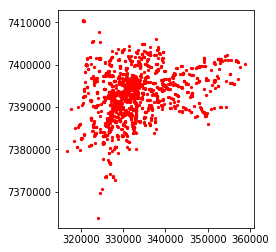

In [25]:
within_sp.plot(marker='o', color='red', markersize=5);

# Plotting Map of Agencies

In [16]:
sp_shp = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/raw/municipio_sp.shp')

In [26]:
sp_shp

CLASSID     FEATID  REVISIONNU       NOME_DIST SIGLA_DIST COD_DIST  \
0       4.0  8583485.0         1.0  JOSE BONIFACIO        JBO       47   
1       4.0  8583484.0         1.0     JD SAO LUIS        JDS       46   
2       4.0  8583445.0         1.0     ARTUR ALVIM        AAL        5   
3       4.0  8583479.0         1.0         JAGUARA        JAG       40   
4       4.0  8583437.0         1.0   VILA PRUDENTE        VPR       93   
..      ...        ...         ...             ...        ...      ...   
91      4.0  8583433.0         1.0      VILA MARIA        VMR       89   
92      4.0  8583434.0         1.0    VILA MARIANA        VMN       90   
93      4.0  8583435.0         1.0    VILA MATILDE        VMT       91   
94      4.0  8583412.0         1.0   SANTA CECILIA        SCE       69   
95      4.0  8583409.0         1.0       REPUBLICA        REP       66   

   COD_SUB  DATA_CRIAC  USUARIO_ID  \
0       27  2007-03-19         0.0   
1       18  2007-03-19         0.0   
2       21  2007-03-19         0.0   
3       08  2007-03-19         0.0   
4       29  2007-03-19         0.0   
..     ...         ...         ...   
91      07  2007-03-19         0.0   
92      12  2007-03-19         0.0   
93      21  2007-03-19         0.0   
94      09  2007-03-19         0.0   
95      09  2007-03-19         0.0   

                                                                                                                                                                                                   geometry  
0   POLYGON ((352436.869 7394174.148, 352450.740 7394171.541, 352468.533 7394165.397, 352468.790 7394165.296, 352469.049 7394165.200, 352469.310 7394165.108, 352469.572 7394165.020, 352469.836 7394164...  
1   POLYGON ((320696.639 7383620.282, 320699.486 7383649.788, 320702.058 7383673.108, 320710.167 7383697.811, 320718.899 7383717.115, 320735.910 7383745.375, 320753.514 7383769.485, 320771.957 7383787...  
2   POLYGON ((349461.276 7397764.525, 349461.935 7397761.333, 349461.965 7397759.985, 349465.688 7397740.335, 349468.519 7397725.394, 349472.124 7397705.722, 349474.622 7397692.094, 349478.228 7397672...  
3   POLYGON ((320731.080 7400614.592, 320732.386 7400615.950, 320733.408 7400617.013, 320733.627 7400617.241, 320734.128 7400617.762, 320738.189 7400621.986, 320741.677 7400625.614, 320743.231 7400627...  
4   POLYGON ((338651.039 7392203.484, 338654.034 7392200.262, 338659.593 7392194.280, 338661.508 7392193.188, 338663.707 7392191.202, 338668.599 7392186.674, 338677.344 7392178.673, 338695.441 7392162...  
..                                                                                                                                                                                                      ...  
91  POLYGON ((338228.823 7397145.610, 338216.895 7397141.953, 338187.099 7397133.249, 338088.140 7397102.216, 338055.523 7397092.625, 337942.320 7397057.139, 337851.621 7397034.794, 337850.795 7397034...  
92  POLYGON ((331606.384 7389277.797, 331607.340 7389290.780, 331608.530 7389307.630, 331609.690 7389325.850, 331610.990 7389345.300, 331611.420 7389352.420, 331612.780 7389371.850, 331613.950 7389392...  
93  POLYGON ((341994.993 7396441.620, 341979.394 7396497.257, 342094.680 7396522.530, 342276.860 7396560.820, 342382.452 7396584.862, 342487.300 7396608.480, 342573.236 7396627.878, 342620.991 7396638...  
94  POLYGON ((330220.609 7396091.962, 330226.819 7396102.563, 330231.141 7396109.941, 330242.092 7396133.608, 330256.923 7396166.239, 330273.199 7396201.862, 330315.251 7396296.367, 330370.898 7396420...  
95  POLYGON ((331990.790 7395882.037, 332014.420 7395902.010, 332016.330 7395903.520, 332047.230 7395927.670, 332059.980 7395937.680, 332067.062 7395943.302, 332076.330 7395950.660, 332077.760 7395951...  

[96 rows x 10 columns]

In [29]:
# Área em km²
sp_shp['area'] = sp_shp.area / 10**6

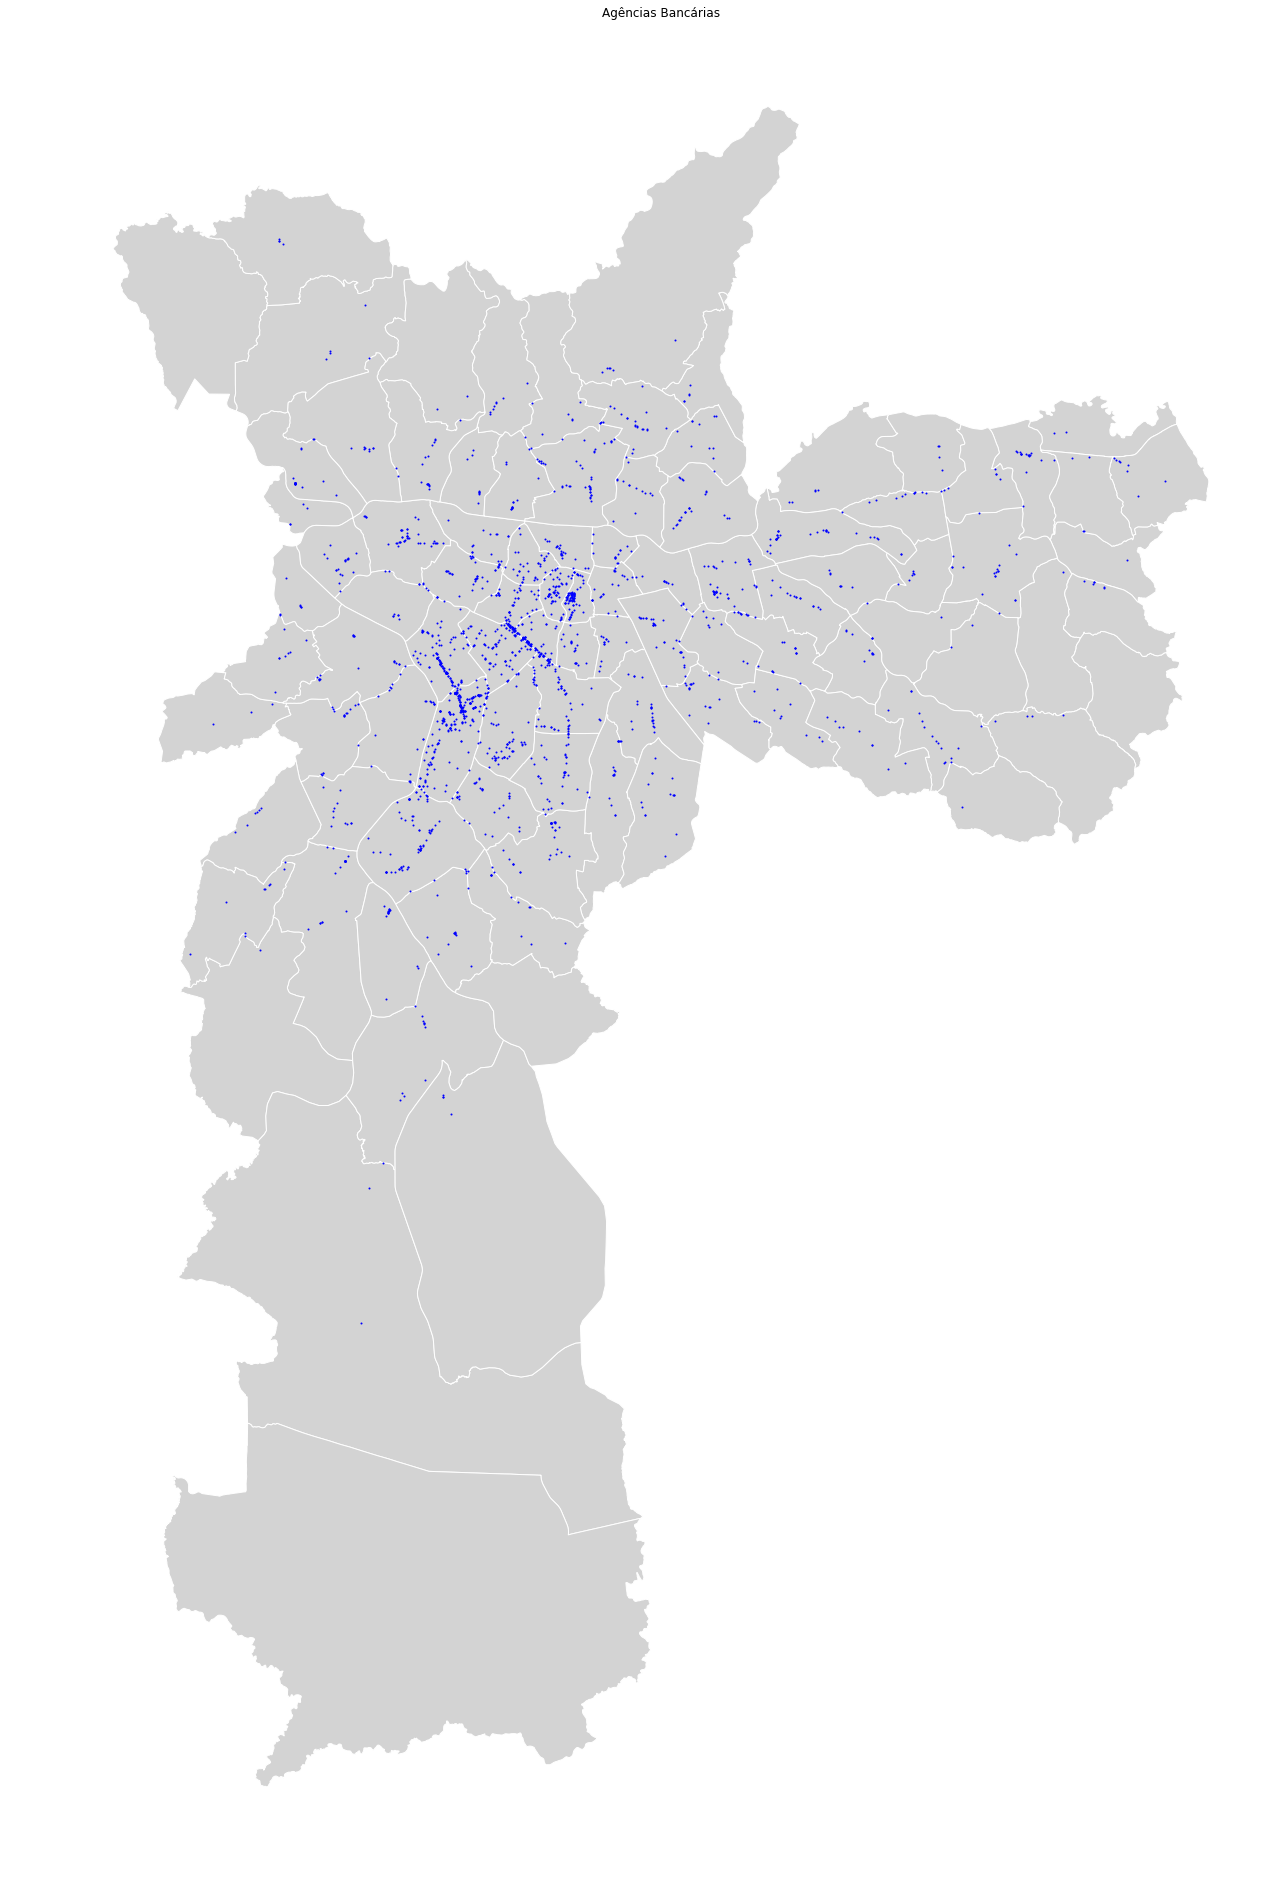

<Figure size 432x288 with 0 Axes>

In [40]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot polygons
sp_shp.plot(ax=ax, facecolor='lightgrey', edgecolor="white")

# Plot points
within_sp.plot(ax=ax, color='blue', markersize=1)

ax.set_title("Agências Bancárias")
ax.axis("off")
plt.show()

### Thematic Map

In [34]:
gdf_agencias_sp_points_join_count = pd.DataFrame(gdf_agencias_sp_points_join['NOME_DIST'].value_counts())

In [35]:
gdf_agencias_sp_points_join_count

NOME_DIST
ITAIM BIBI            253
PINHEIROS             118
JD PAULISTA            99
SE                     85
BELA VISTA             83
...                   ...
BRASILANDIA             2
JOSE BONIFACIO          1
LAJEADO                 1
SAO RAFAEL              1
CID LIDER               1

[92 rows x 1 columns]

In [36]:
gdf_agencias_sp_points_join_count = gdf_agencias_sp_points_join_count.reset_index()

In [37]:
gdf_agencias_sp_points_join_count.columns = ['distrito', 'contagem']

In [38]:
sp_shp_agg = sp_shp.merge(gdf_agencias_sp_points_join_count, how='left',left_on='NOME_DIST', right_on='distrito')

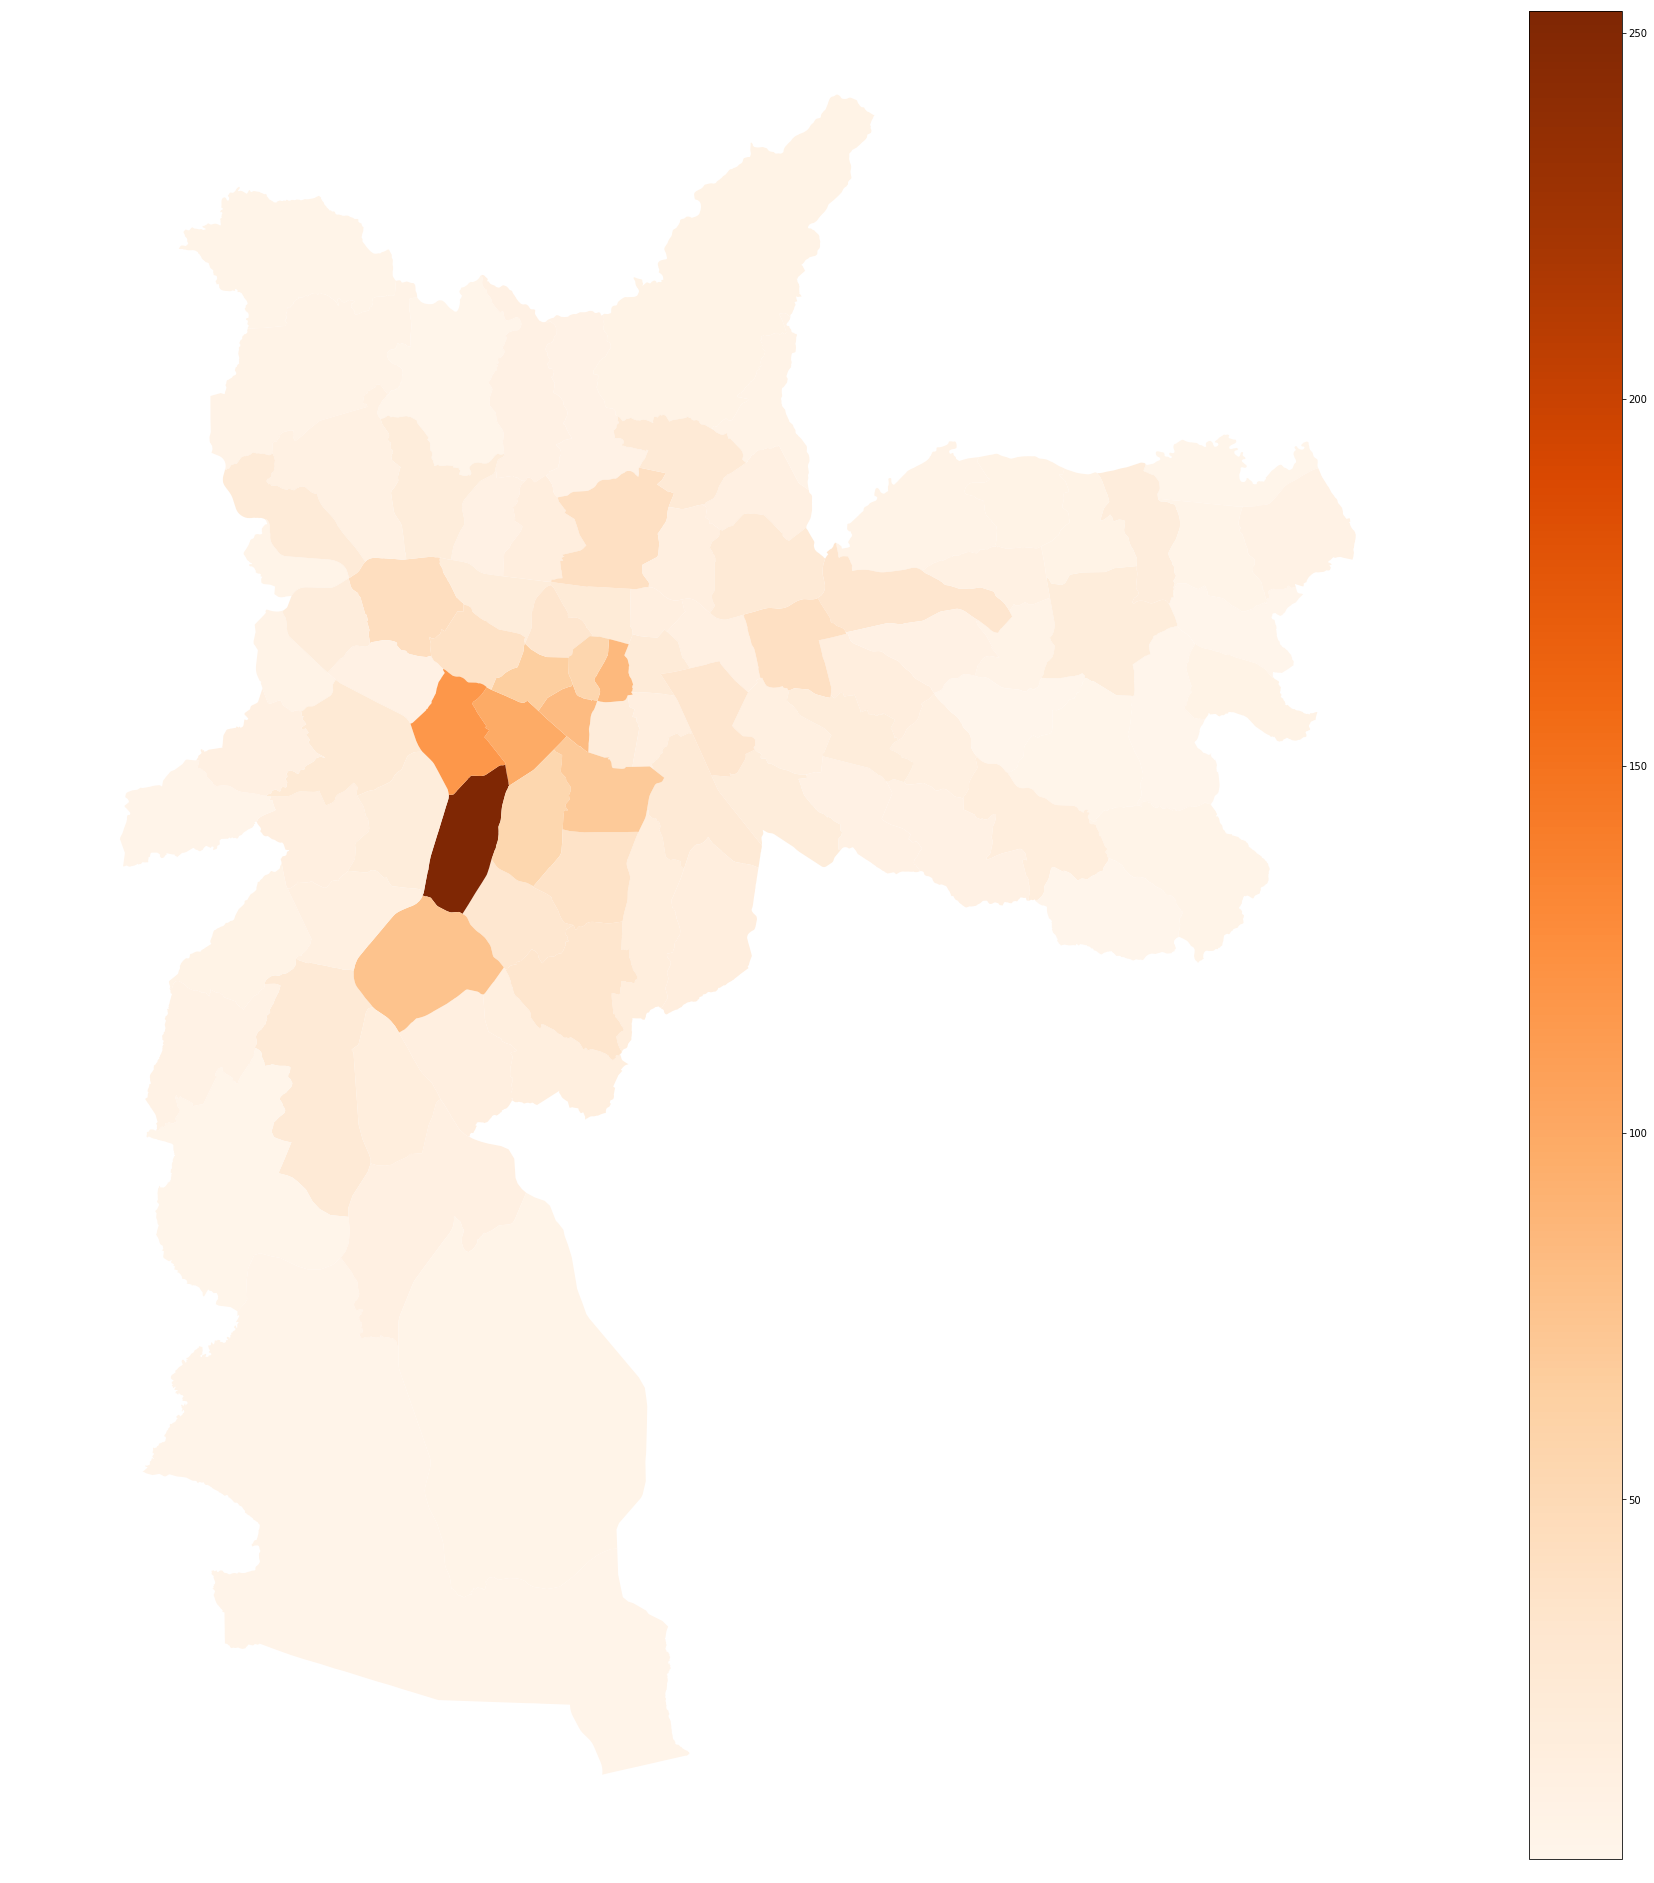

In [39]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot
sp_shp_agg.plot(column='contagem', cmap="Oranges", legend=True, ax=ax)

ax.axis("off")
plt.show()